In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

### **MNIST dataset**

---

MNIST stands for **Modified National Institute of Standards and Technology**. This datase consists of handwritten numerical digits.

In [2]:
mnist = tf.keras.datasets.mnist

 - Loading MNIST dataset.

In [3]:
(X_train_full, y_train_full), (X_test,y_test) = mnist.load_data()

 - Applying unit scaling on input features where we'll normalize the value  to a range between 0 and 1. As the pixel values will be from 0 to 255, thus, we'll divide it by 255

In [4]:
X_train_full , X_test = X_train_full/255 , X_test/255

In [5]:
X_train_full.shape

(60000, 28, 28)

 - Analyzing the first list of arays containing datapoints.

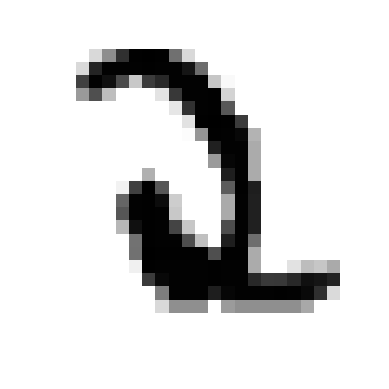

In [6]:
n_th_image = 400

plt.imshow(X_train_full[n_th_image],
           cmap = 'binary')
plt.axis("Off")
plt.show()

In [7]:

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
from tensorflow.keras.models import Sequential

In [9]:
LAYERS = [tf.keras.layers.Flatten(input_shape = [28, 28], 
                                  name = "inputlayer"), 
          tf.keras.layers.Dense(300,
                               activation = "relu",
                               name = "hiddenlayer1"),
          tf.keras.layers.Dense(100,
                                activation = "relu",
                                name = "hiddenlayer2"),
          tf.keras.layers.Dense(10,
                                activation = "softmax",
                                name = "outputlayer")]

Let's understand the above code:

- ```python
  tf.keras.layers.Flatten(input_shape=[28, 28], name="inputlayer")
  ```
  ---
  
    This creates the input layer of the neural network. The `Flatten` layer is used to reshape the 28x28 input images into a 1-dimensional array of size 784 i.e. (28 * 28). It is necessary to flatten the input images before feeding them into the fully connected layers. The `input_shape` parameter specifies the shape of the input data, which is [28, 28] for the 28x28 pixel images.

- ```python
  tf.keras.layers.Dense(300, activation="relu", name="hiddenlayer1")
  ```
  ---

    This creates the first hidden layer of the neural network. The Dense layer represents a fully connected layer where each neuron is connected to every neuron in the previous layer. The 300 specifies the number of neurons (also called units) in this layer. The `activation="relu"` argument indicates that the Rectified Linear Unit (ReLU) activation function will be used for the neurons in this layer. ReLU is commonly used as an activation function in hidden layers due to its ability to introduce non-linearity in the network.

- ```python
  tf.keras.layers.Dense(100, activation="relu", name="hiddenlayer2")
  ```
  ---

    This line creates the second hidden layer of the neural network. Similar to the previous line, this layer also has 100 neurons with the ReLU activation function.

- ```python
  tf.keras.layers.Dense(10, activation="softmax", name="outputlayer")
  ```
  ---

    This line creates the output layer of the neural network. The output layer has **10 neurons**, corresponding to the **10 possible classes** in the MNIST dataset **(digits 0 to 9)**. The activation="softmax" argument indicates that the Softmax activation function will be used for the neurons in this layer. Softmax is suitable for multi-class classification tasks as it converts the raw model outputs into a probability distribution over the classes, ensuring that the probabilities sum to 1.

In [10]:
model_clf = Sequential(LAYERS)

The `Sequential` class in Keras allows you to build a neural network by simply adding one layer at a time in a **linear fashion**.

Here, the `LAYERS` list contains instances of Keras layer objects that specify the architecture of the neural network. The layers in the list are ordered sequentially, representing the flow of data through the network from the input layer to the output layer.

The Sequential model is suitable for building feedforward neural networks where each layer passes its output to the next layer without any complex connections like skip connections or multiple inputs/outputs. It's commonly used for simple feedforward architectures like the one shown in the LAYERS list.

In [11]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


After creating the Sequential model, you can compile it and train it on data using the standard Keras functionalities. 

For example, here we'll compile the model with:
 - `optimizer`
 - `loss function`
 - `metrics` 
 
And then train it on the MNIST dataset.

In [12]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

In [13]:
model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

In the below cell,

 - The variable `EPOCHS` is set to $50$. An epoch represents a single pass of the entire training dataset through the neural network during the training process.

 - ```python
   model_clf_training = model_clf.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET)
   ```

   This performs the training process of the `model_clf` neural network using the `fit` method. The fit method trains the model on the provided training data (X_train and y_train) and validates it on the validation data (X_valid and y_valid). The model will be trained for the number of epochs specified by the EPOCHS variable.

In [14]:
EPOCHS = 5
VALIDATION_SET = (X_valid, y_valid)
model_clf_training = model_clf.fit(X_train, y_train, 
                                   epochs = EPOCHS, 
                                   validation_data = VALIDATION_SET)

Epoch 1/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2114 - accuracy: 0.9382 - val_loss: 0.0954 - val_accuracy: 0.9732
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.1121 - val_accuracy: 0.9686
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0603 - accuracy: 0.9807 - val_loss: 0.0699 - val_accuracy: 0.9784
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9857 - val_loss: 0.0869 - val_accuracy: 0.9726
Epoch 5/5
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0933 - val_accuracy: 0.9742


**NOTE** :

During training, the model will try to minimize the loss function (`sparse categorical crossentropy`) using the Adam optimizer (as specified during model compilation) while adjusting its weights and biases. The validation data will be used to evaluate the model's performance at the end of each epoch, helping to monitor how well the model generalizes to unseen data.


In [15]:
import time
def save_trained_model(model_dir = "E:/Project/NN/SAVED_ANN_MODEL/"):
    os.makedirs(model_dir, exist_ok = True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path = os.path.join(model_dir, fileName)
    print(f"Model saved at the given location: {model_path}")
    return model_path

In [16]:
model_clf.save(save_trained_model())

Model saved at the given location: E:/Project/NN/SAVED_ANN_MODEL/Model_2023_08_02_11_05_04_.h5


c:\Users\KUSHAL\anaconda3\envs\DL\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
pd.DataFrame(model_clf_training.history)

,loss,accuracy,val_loss,val_accuracy
0,0.211407,0.938200,0.095435,0.9732
1,0.087256,0.972855,0.112144,0.9686
2,0.060339,0.980709,0.069936,0.9784
3,0.043770,0.985745,0.086872,0.9726
4,0.035735,0.988436,0.093347,0.9742


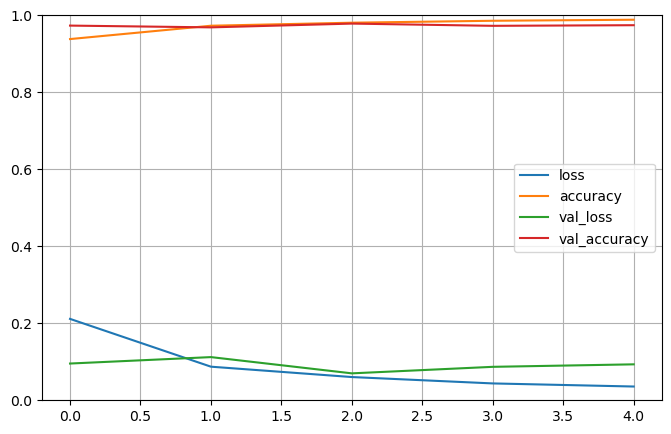

In [18]:
pd.DataFrame(model_clf_training.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0964 - accuracy: 0.9729


[0.09642644971609116, 0.9728999733924866]

 - This evaluates the trained model on the test dataset. 
 - The evaluate method computes the specified metrics on the provided test data and labels.
 - The model will make predictions on the test data using its learned parameters, and then it will compare those predictions to the true labels (y_test). The performance metrics specified during the model compilation (e.g., accuracy) will be calculated based on this comparison.

The evaluate method will return a list of evaluation results, typically containing the values of the specified metrics. For example, if the model was compiled with accuracy as the metric, the evaluate method's return value will be a list containing the accuracy value on the test dataset.

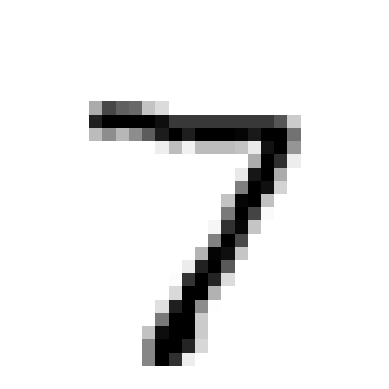

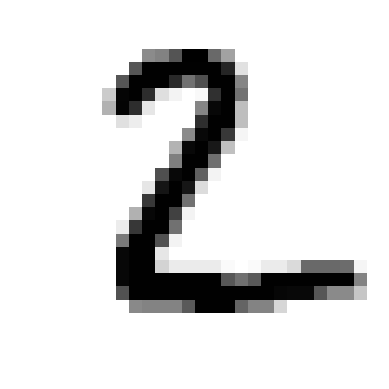

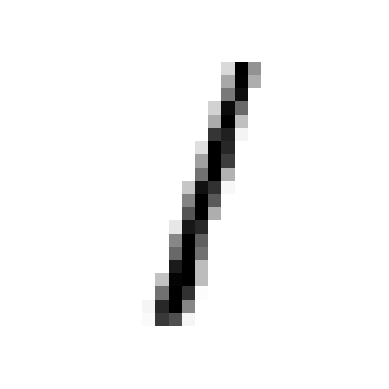

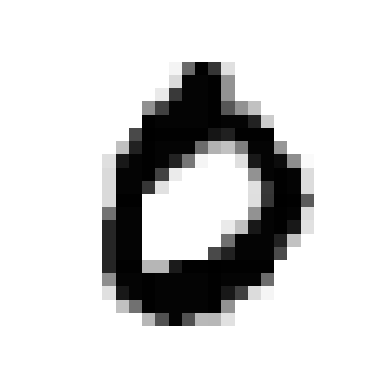

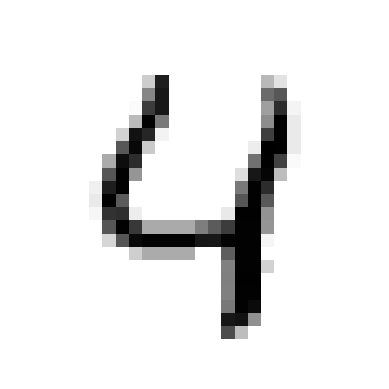

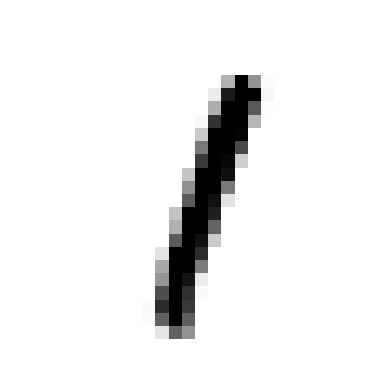

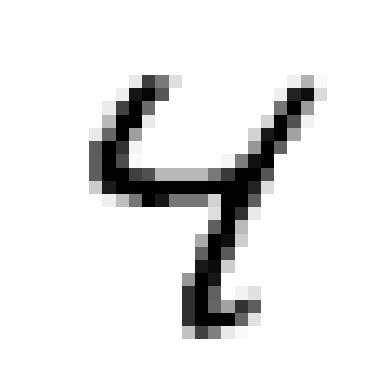

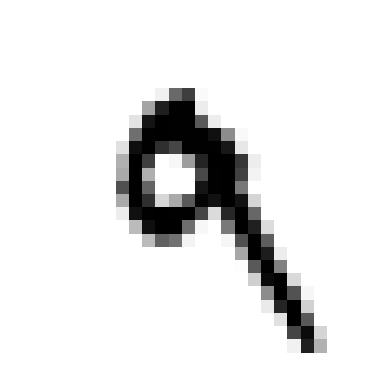

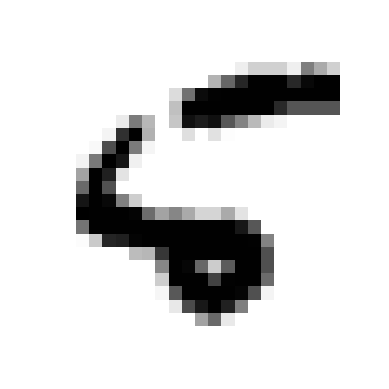

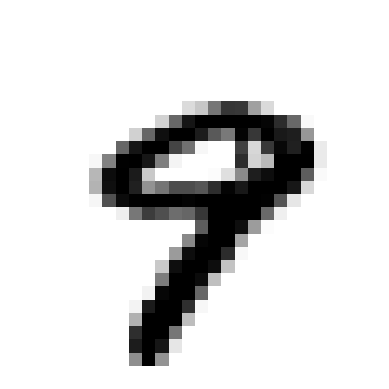

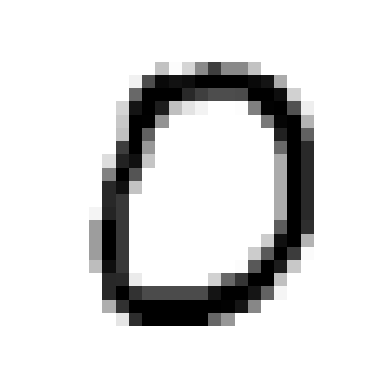

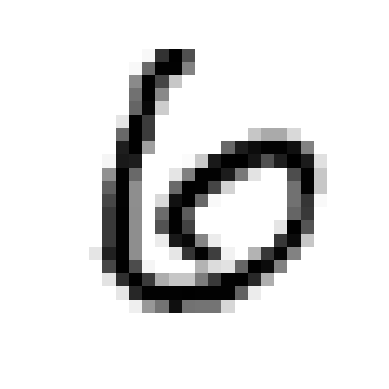

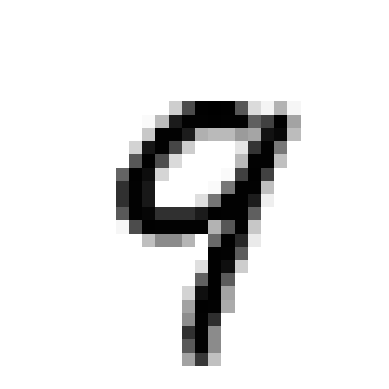

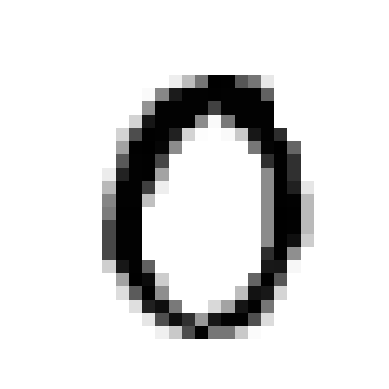

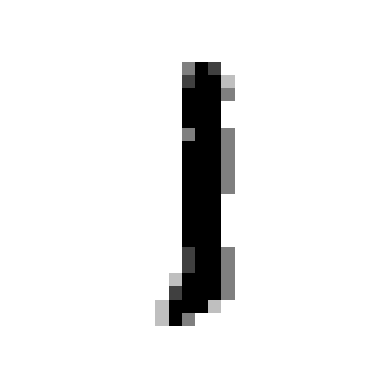

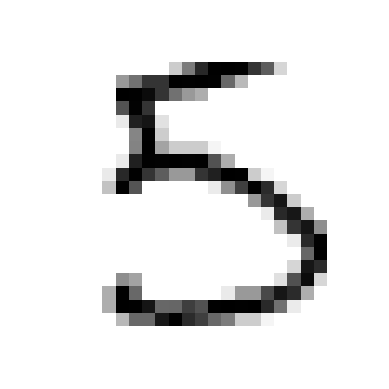

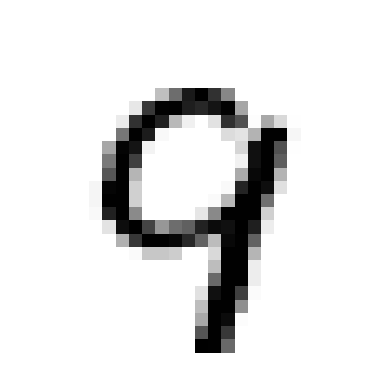

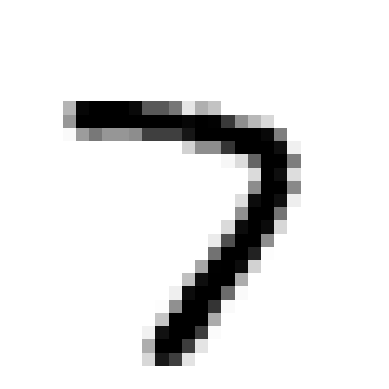

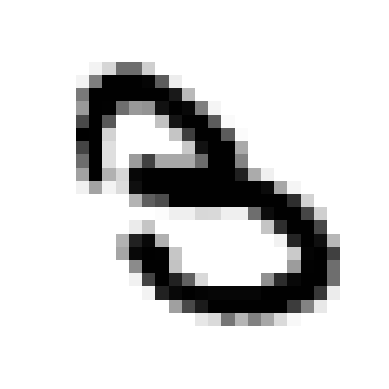

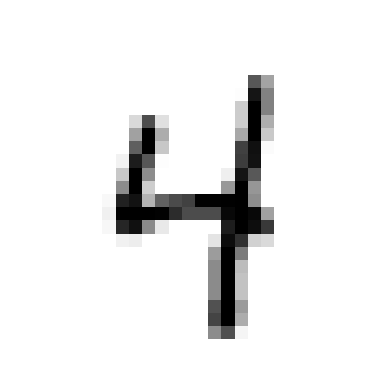

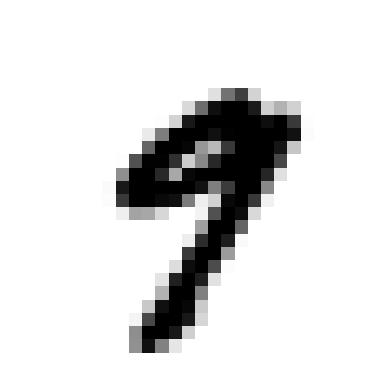

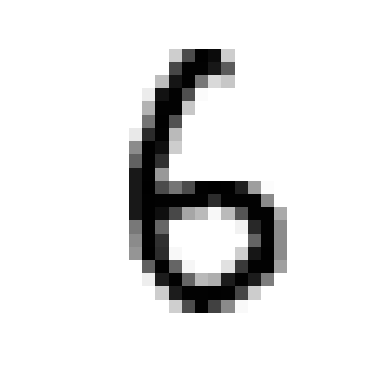

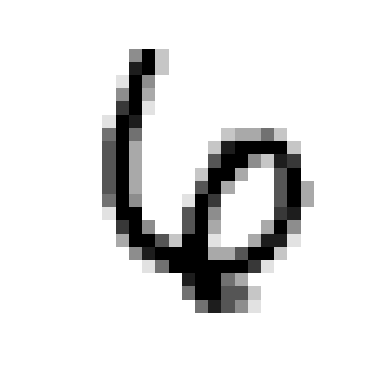

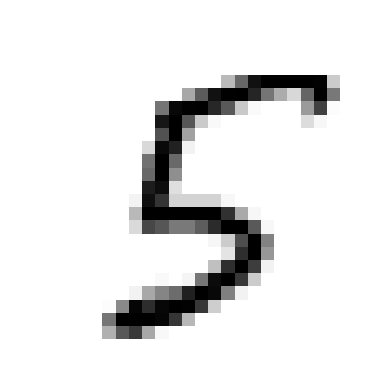

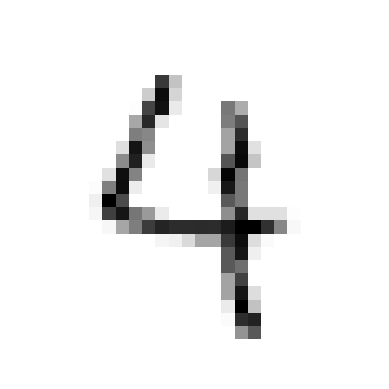

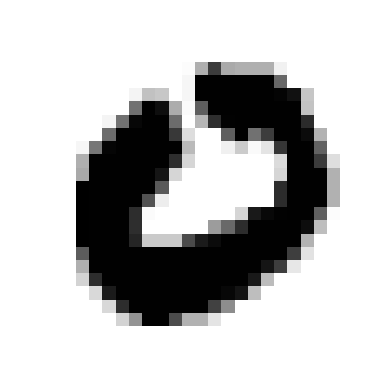

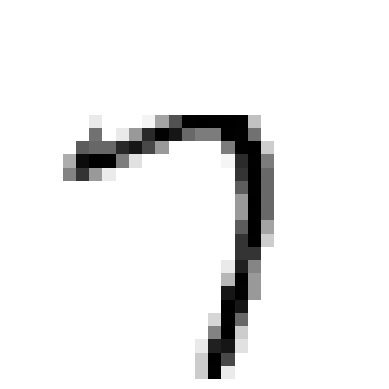

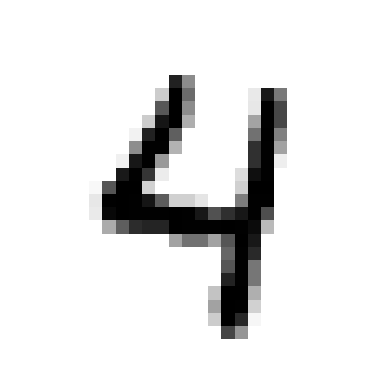

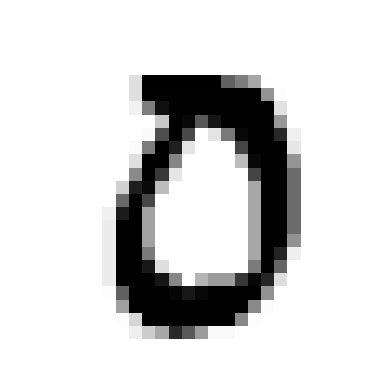

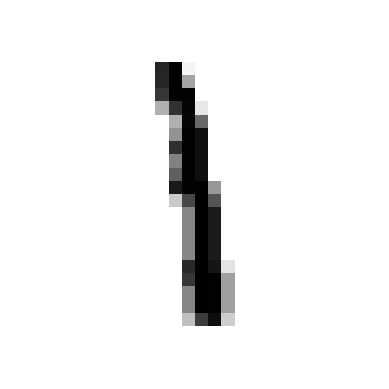

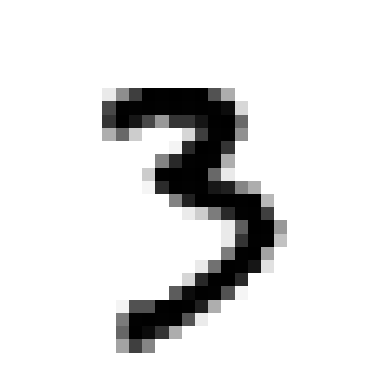

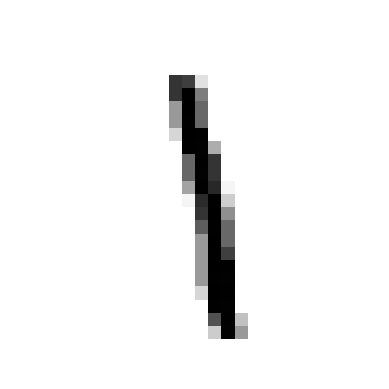

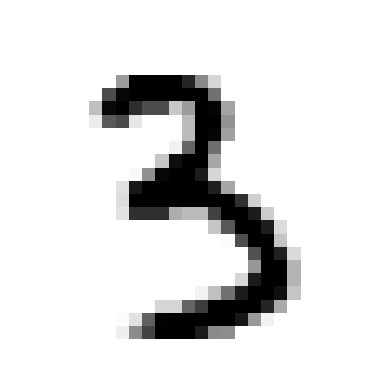

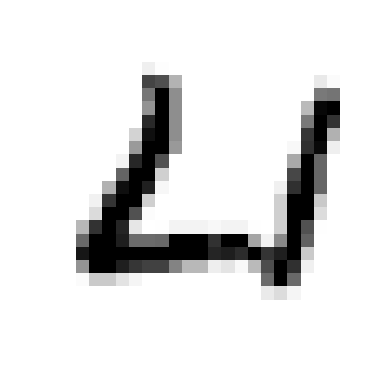

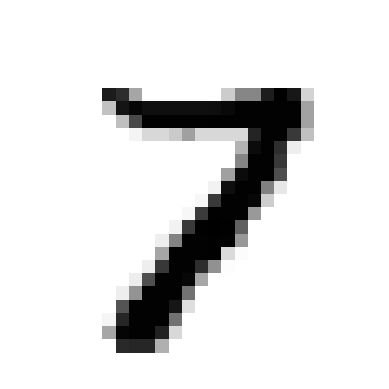

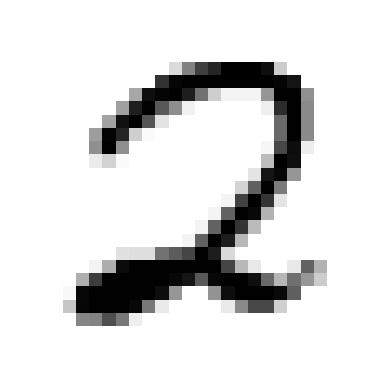

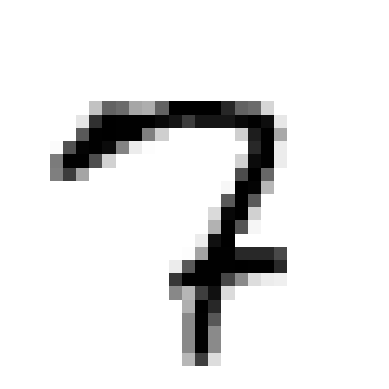

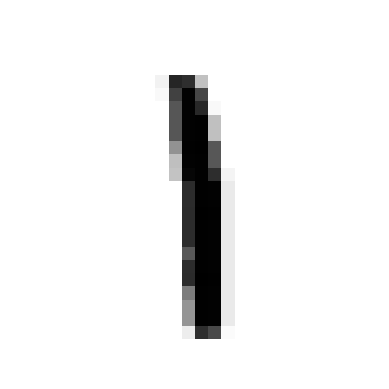

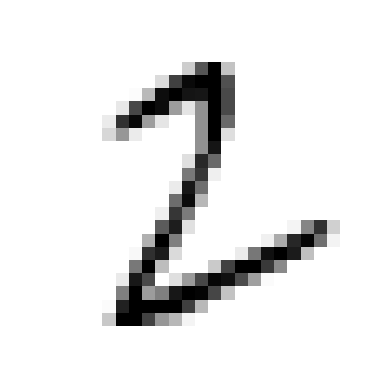

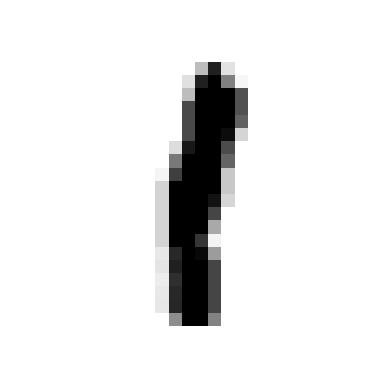

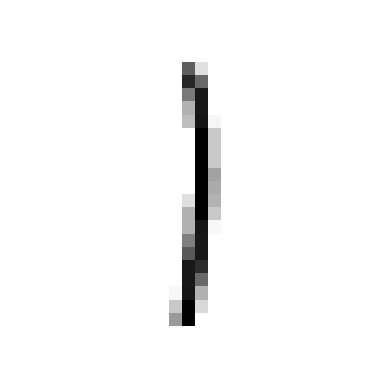

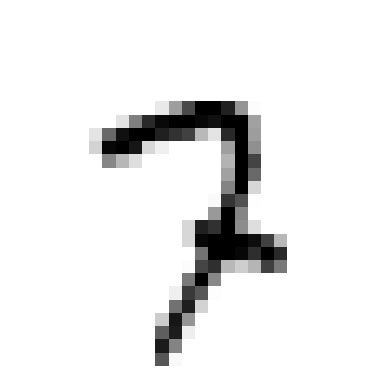

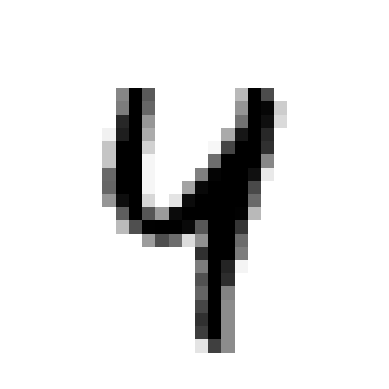

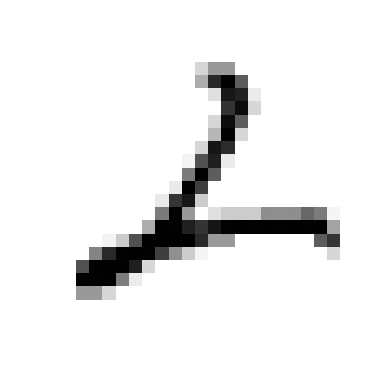

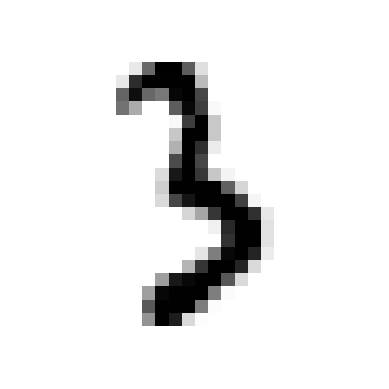

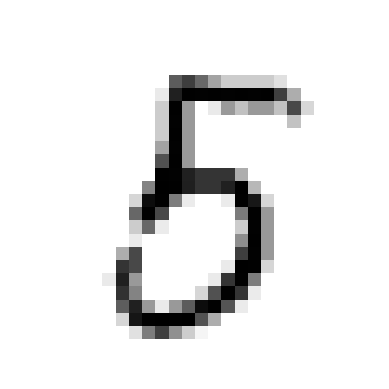

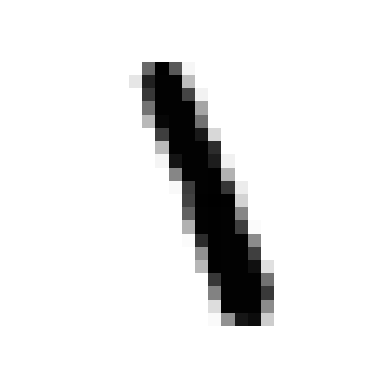

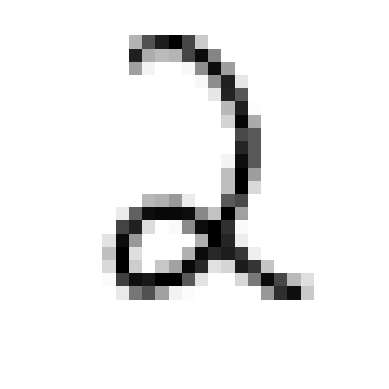

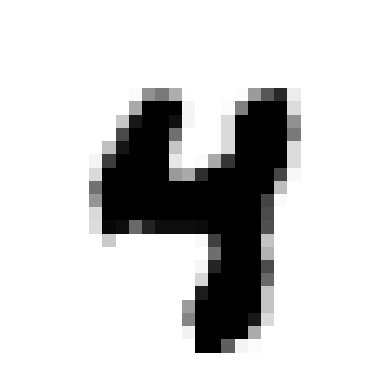

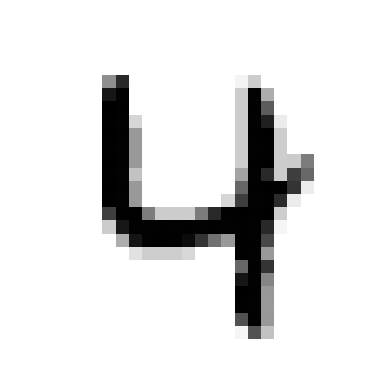

In [20]:
for i in range(0,50):
    plt.imshow(X_test[i], cmap = 'binary')
    plt.axis("off")
    plt.show()

In [21]:
prediction = model_clf.predict(X_test[0:10])

prediction

1/1 [==============================] - 0s 82ms/step


array([[1.26748567e-09, 1.41465140e-09, 2.35199536e-07, 2.42739286e-08,
        9.01944144e-12, 3.90759855e-11, 8.69241145e-16, 9.99998212e-01,
        1.12184473e-09, 1.49668199e-06],
       [1.04095073e-10, 2.08047777e-06, 9.99997497e-01, 3.89702677e-07,
        7.01806912e-14, 7.75240983e-11, 1.09354383e-11, 1.95373917e-09,
        1.59895759e-08, 6.07692976e-12],
       [2.66476956e-08, 9.99510050e-01, 8.53701204e-06, 5.12823362e-07,
        6.85140767e-05, 4.28924132e-08, 7.58597616e-06, 3.98794480e-04,
        5.85996486e-06, 1.35277858e-07],
       [9.99775112e-01, 2.52349253e-08, 3.21029484e-06, 1.32517761e-10,
        2.62955109e-06, 9.90261900e-11, 6.81626091e-07, 1.17941112e-04,
        6.16848406e-10, 1.00400583e-04],
       [1.44321262e-07, 1.07912506e-07, 9.08121933e-08, 6.75072845e-11,
        9.95682955e-01, 2.30860153e-09, 1.18803811e-08, 8.44042443e-05,
        4.75247219e-09, 4.23224131e-03],
       [4.44854639e-11, 9.99767959e-01, 7.16293336e-09, 2.51051113e-09,
   